In [ ]:
import numpy as np 
import pandas as pd 
import librosa  
import matplotlib.pyplot as plt 
 
# MLP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
 
# LSTM Classifier
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# **DATA**

In [ ]:
#!unzip '/gdrive/My Drive/soundnn/test.zip'
#!unzip '/gdrive/My Drive/soundnn/train.zip'


Archive:  /gdrive/My Drive/soundnn/test.zip
   creating: test/
  inflating: test/2705F.wav          
  inflating: test/2707M.wav          
  inflating: test/2708F.wav          
  inflating: test/2710M.wav          
  inflating: test/2711M.wav          
  inflating: test/2712M.wav          
  inflating: test/2713M.wav          
  inflating: test/2714M.wav          
  inflating: test/2715M.wav          
  inflating: test/2720F.wav          
  inflating: test/2721M.wav          
  inflating: test/2722F.wav          
  inflating: test/2724F.wav          
  inflating: test/2725M.wav          
  inflating: test/2726M.wav          
  inflating: test/2727F.wav          
  inflating: test/2728M.wav          
  inflating: test/2729F.wav          
  inflating: test/2733M.wav          
  inflating: test/2734F.wav          
  inflating: test/2735M.wav          
  inflating: test/2736M.wav          
  inflating: test/2737F.wav          
  inflating: test/2738M.wav          
  inflating: test/2740M.w

In [ ]:
import glob 
trains = []
trains = glob.glob("/content/train/*.wav")
trains

['/content/train/1565MA.wav',
 '/content/train/0900FN.wav',
 '/content/train/0743FN.wav',
 '/content/train/1658MN.wav',
 '/content/train/2316MS.wav',
 '/content/train/1638FA.wav',
 '/content/train/0475FH.wav',
 '/content/train/2228FN.wav',
 '/content/train/2345MN.wav',
 '/content/train/0456MN.wav',
 '/content/train/0727FW.wav',
 '/content/train/1982MA.wav',
 '/content/train/1331FA.wav',
 '/content/train/1503FW.wav',
 '/content/train/1944MA.wav',
 '/content/train/1174MA.wav',
 '/content/train/0897MA.wav',
 '/content/train/1942FN.wav',
 '/content/train/1915MS.wav',
 '/content/train/1232FA.wav',
 '/content/train/1356FH.wav',
 '/content/train/1131FH.wav',
 '/content/train/1615MA.wav',
 '/content/train/1595FH.wav',
 '/content/train/2253MA.wav',
 '/content/train/1275MN.wav',
 '/content/train/1632FA.wav',
 '/content/train/0033MN.wav',
 '/content/train/2153MN.wav',
 '/content/train/0023FH.wav',
 '/content/train/1034FA.wav',
 '/content/train/2648MA.wav',
 '/content/train/0661FA.wav',
 '/content

In [ ]:
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    
    return mfccs

In [ ]:
train_labels = [] 
train_mfccs = [] 
train_IDs = []
for i in trains:
  label = i[-5]
  audioID = i[-10:-6]
  train_labels.append(label)
  train_IDs.append(audioID)
  train_mfccs.append(extract_mfcc(i))

train_mfccs

[array([-2.4873756e+02,  1.1894684e+02, -2.2266226e+01,  2.5122400e+01,
         8.5118551e+00, -5.4474502e+00, -1.1062857e+01,  1.7231516e+00,
        -2.8838852e+01, -3.0779102e+00, -4.2580514e+00, -5.6191616e+00,
        -4.1425157e+00,  5.0873265e+00, -7.2525635e+00,  4.6423621e+00,
        -1.3835615e+01,  4.4746633e+00, -1.0692666e+00, -4.1377277e+00,
        -8.1908436e+00,  2.9665425e+00, -8.5600071e+00, -3.3092146e+00,
        -5.5139914e+00,  3.5398610e+00, -7.3020582e+00, -3.3082416e+00,
        -4.0287962e+00,  1.8100097e+00, -9.0357285e+00, -7.0065398e+00,
         1.7605675e+00, -2.2716658e+00, -7.2110610e+00,  4.9723806e+00,
        -5.2413025e+00,  3.0897248e-01, -4.4077473e+00,  2.1285547e-01],
       dtype=float32),
 array([-2.93186523e+02,  8.98530045e+01,  2.18896408e+01,  2.15694275e+01,
         1.50737572e+01,  7.48184872e+00, -1.93451328e+01, -1.14603529e+01,
        -1.64526443e+01,  7.61763334e+00, -7.68722153e+00, -1.86662889e+00,
        -1.79646511e+01,  6.

In [ ]:
train_mfccs_array = np.asarray(train_mfccs)
train_labels_array = np.array(train_labels)
train_labels_array.shape 

(1994,)

In [ ]:
#A=0, N=1, W=2, S=3, H=4
for i in range(len(train_labels_array)):
  if train_labels_array[i] == 'A':
    train_labels_array[i]=0
  elif train_labels_array[i] == 'N':
    train_labels_array[i]=1
  elif train_labels_array[i] == 'W':
    train_labels_array[i]=2
  elif train_labels_array[i] == 'S':
    train_labels_array[i]=3
  elif train_labels_array[i] == 'H':
    train_labels_array[i]=4

In [ ]:
train_labels_array[9]

'1'

In [ ]:
train_labels_categorical = to_categorical(train_labels_array) # converts a class vector (integers) to binary class matrix
train_labels_categorical.shape

(1994, 5)

In [ ]:
train_labels_categorical

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
train_mfccs_array

array([[-2.4873756e+02,  1.1894684e+02, -2.2266226e+01, ...,
         3.0897248e-01, -4.4077473e+00,  2.1285547e-01],
       [-2.9318652e+02,  8.9853004e+01,  2.1889641e+01, ...,
         2.4593422e+00,  2.2393303e+00,  7.7158408e+00],
       [-3.3547937e+02,  9.6035408e+01,  2.9279390e+01, ...,
        -7.4387354e-01, -8.7285417e-01, -5.5748379e-01],
       ...,
       [-2.5590765e+02,  6.1081619e+01, -1.7442465e+01, ...,
        -2.2634583e+00, -1.3700434e+00, -7.2475225e-02],
       [-3.4069318e+02,  1.5817297e+02,  6.2117934e+00, ...,
        -1.5647344e-01,  1.3911697e-01, -1.6434692e+00],
       [-3.3649194e+02,  1.3685098e+02,  2.4247843e+01, ...,
        -2.6874146e+00, -4.1462159e+00, -1.4257389e+00]], dtype=float32)

In [ ]:
train_mfccs_array.shape

(1994, 40)

In [ ]:
tests = []
tests = glob.glob("/content/test/*.wav")
tests.sort()
tests

test_labels = [] 
test_mfccs = [] 
test_IDs = []
for i in tests:
  test_mfccs.append(extract_mfcc(i))
  audioID = i[-9:-4]
  test_IDs.append(audioID)   

In [ ]:

result_df = pd.read_csv('/gdrive/My Drive/soundnn//result.csv')
result_df

,Id,label
0,2705F,N
1,2707M,H
2,2708F,N
3,2710M,A
4,2711M,A
...,...,...
222,2992M,S
223,2993M,N
224,2995M,N
225,2996F,W


In [ ]:
len(tests)

227

In [ ]:
tests

['/content/test/2705F.wav',
 '/content/test/2707M.wav',
 '/content/test/2708F.wav',
 '/content/test/2710M.wav',
 '/content/test/2711M.wav',
 '/content/test/2712M.wav',
 '/content/test/2713M.wav',
 '/content/test/2714M.wav',
 '/content/test/2715M.wav',
 '/content/test/2720F.wav',
 '/content/test/2721M.wav',
 '/content/test/2722F.wav',
 '/content/test/2724F.wav',
 '/content/test/2725M.wav',
 '/content/test/2726M.wav',
 '/content/test/2727F.wav',
 '/content/test/2728M.wav',
 '/content/test/2729F.wav',
 '/content/test/2733M.wav',
 '/content/test/2734F.wav',
 '/content/test/2735M.wav',
 '/content/test/2736M.wav',
 '/content/test/2737F.wav',
 '/content/test/2738M.wav',
 '/content/test/2740M.wav',
 '/content/test/2741M.wav',
 '/content/test/2743M.wav',
 '/content/test/2744F.wav',
 '/content/test/2745F.wav',
 '/content/test/2746F.wav',
 '/content/test/2747M.wav',
 '/content/test/2748M.wav',
 '/content/test/2749M.wav',
 '/content/test/2750M.wav',
 '/content/test/2752M.wav',
 '/content/test/2753

In [ ]:
for i in result_df['label']:
  test_labels.append(i)
test_labels

['N',
 'H',
 'N',
 'A',
 'A',
 'A',
 'W',
 'H',
 'A',
 'N',
 'N',
 'A',
 'S',
 'W',
 'A',
 'A',
 'S',
 'S',
 'A',
 'N',
 'A',
 'N',
 'W',
 'A',
 'N',
 'A',
 'A',
 'S',
 'A',
 'S',
 'N',
 'N',
 'N',
 'N',
 'N',
 'A',
 'S',
 'H',
 'A',
 'N',
 'N',
 'N',
 'A',
 'H',
 'N',
 'N',
 'A',
 'A',
 'S',
 'N',
 'N',
 'N',
 'S',
 'N',
 'A',
 'N',
 'N',
 'A',
 'H',
 'A',
 'S',
 'S',
 'A',
 'A',
 'N',
 'S',
 'A',
 'W',
 'A',
 'S',
 'A',
 'N',
 'A',
 'S',
 'S',
 'H',
 'A',
 'H',
 'A',
 'A',
 'N',
 'N',
 'S',
 'H',
 'A',
 'N',
 'A',
 'S',
 'H',
 'H',
 'N',
 'N',
 'S',
 'A',
 'A',
 'S',
 'A',
 'S',
 'A',
 'N',
 'N',
 'N',
 'N',
 'N',
 'A',
 'A',
 'N',
 'N',
 'A',
 'N',
 'A',
 'N',
 'A',
 'N',
 'S',
 'N',
 'A',
 'N',
 'S',
 'W',
 'N',
 'A',
 'N',
 'H',
 'N',
 'N',
 'H',
 'A',
 'W',
 'N',
 'N',
 'A',
 'N',
 'A',
 'S',
 'S',
 'N',
 'H',
 'N',
 'N',
 'A',
 'N',
 'N',
 'H',
 'N',
 'N',
 'N',
 'A',
 'S',
 'N',
 'N',
 'N',
 'A',
 'N',
 'H',
 'A',
 'A',
 'A',
 'N',
 'H',
 'A',
 'H',
 'A',
 'A',
 'N',
 'A',
 'N'

In [ ]:
result_df['label']

0      N
1      H
2      N
3      A
4      A
      ..
222    S
223    N
224    N
225    W
226    H
Name: label, Length: 227, dtype: object

In [ ]:
test_mfccs_array = np.asarray(test_mfccs)
test_labels_array = np.array(test_labels)
test_labels_array.shape 

(227,)

In [ ]:
#A=0, N=1, W=2, S=3, H=4
for i in range(len(test_labels_array)):
  if test_labels_array[i] == 'A':
    test_labels_array[i]=0
  elif test_labels_array[i] == 'N':
    test_labels_array[i]=1
  elif test_labels_array[i] == 'W':
    test_labels_array[i]=2
  elif test_labels_array[i] == 'S':
    test_labels_array[i]=3
  elif test_labels_array[i] == 'H':
    test_labels_array[i]=4

In [ ]:
test_labels_array[0]

'1'

In [ ]:
test_labels_categorical = to_categorical(test_labels_array) # converts a class vector (integers) to binary class matrix
test_labels_categorical.shape

(227, 5)

In [ ]:
test_labels_categorical

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
test_mfccs_array

array([[-3.5604962e+02,  1.5505977e+02,  6.6727099e+00, ...,
         3.9997666e+00,  5.3251109e+00,  5.7585011e+00],
       [-3.3681232e+02,  1.4139563e+02,  7.7056026e-01, ...,
        -2.8718877e-01, -9.9262750e-01,  9.4203472e-01],
       [-3.1200836e+02,  6.8943817e+01,  9.5268736e+00, ...,
        -2.8634775e+00, -6.7830223e-01, -2.0404720e+00],
       ...,
       [-3.1419214e+02,  9.3968552e+01,  1.5240735e+01, ...,
        -1.3190223e+00, -3.8121498e+00, -2.1059912e-01],
       [-2.7130154e+02,  7.3762161e+01,  1.2210320e+00, ...,
        -6.4510638e-01,  1.3364038e+00, -8.4563011e-01],
       [-3.0528787e+02,  1.2675326e+02,  5.6040492e+00, ...,
        -6.3301482e+00,  1.1925044e+00, -7.0800204e-03]], dtype=float32)

In [ ]:
test_mfccs_array.shape

(227, 40)

In [ ]:
number_of_samples = train_mfccs_array.shape[0]
number_of_testSamples = test_mfccs_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.2)
test_samples = int(number_of_testSamples)

In [ ]:
training_samples

1595

In [ ]:
validation_samples

398

In [ ]:
test_samples

227

# **MODEL**

## **LSTM-Mfcc**

In [ ]:
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128 , input_shape=(40, 1)) , activation = sigmoid)
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('tanh'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(5))
    model.add(Activation('softmax'))
    
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

In [ ]:
w = np.expand_dims(train_mfccs_array[:training_samples],-1)

In [ ]:
w.shape

(1595, 40, 1)

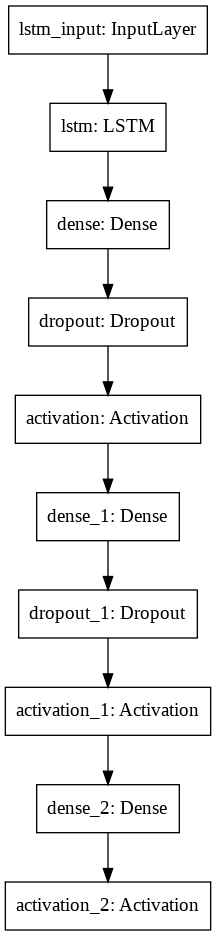

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_A)

In [ ]:
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(train_mfccs_array[:training_samples],-1), train_labels_categorical[:training_samples], validation_data=(np.expand_dims(train_mfccs_array[training_samples:training_samples+validation_samples], -1), train_labels_categorical[training_samples:training_samples+validation_samples]), epochs=200, shuffle=True)

Epoch 1/200
50/50 [==============================] - 5s 53ms/step - loss: 1.5349 - accuracy: 0.3592 - val_loss: 1.4611 - val_accuracy: 0.4749
Epoch 2/200
50/50 [==============================] - 2s 43ms/step - loss: 1.4252 - accuracy: 0.4865 - val_loss: 1.3900 - val_accuracy: 0.4824
Epoch 3/200
50/50 [==============================] - 2s 42ms/step - loss: 1.3644 - accuracy: 0.5078 - val_loss: 1.3584 - val_accuracy: 0.4950
Epoch 4/200
50/50 [==============================] - 2s 42ms/step - loss: 1.3576 - accuracy: 0.5147 - val_loss: 1.3415 - val_accuracy: 0.5000
Epoch 5/200
50/50 [==============================] - 2s 42ms/step - loss: 1.3282 - accuracy: 0.5292 - val_loss: 1.3319 - val_accuracy: 0.5126
Epoch 6/200
50/50 [==============================] - 2s 42ms/step - loss: 1.3251 - accuracy: 0.5392 - val_loss: 1.3235 - val_accuracy: 0.5151
Epoch 7/200
50/50 [==============================] - 2s 42ms/step - loss: 1.3138 - accuracy: 0.5379 - val_loss: 1.3182 - val_accuracy: 0.5176
Epoch 

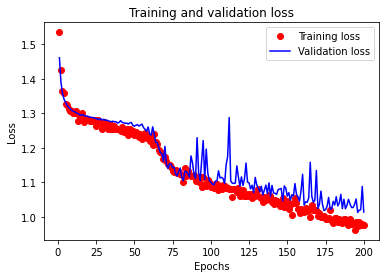

In [ ]:
# loss plots using LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

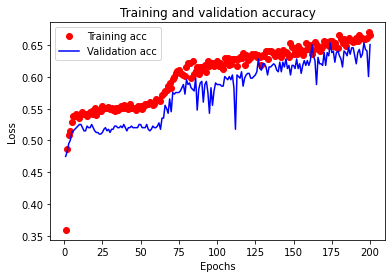

In [ ]:
# accuracy plots using LSTM model
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# evaluate using model A
model_A.evaluate(np.expand_dims(test_mfccs_array[:test_samples], -1), test_labels_categorical[:test_samples])

8/8 [==============================] - 0s 14ms/step - loss: 1.0542 - accuracy: 0.6211


[1.0541801452636719, 0.6211453676223755]

## **GRU-Mfcc**

In [ ]:
def create_model_GRU():
    model = Sequential()
    model.add(GRU(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('tanh'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(5))
    model.add(Activation('softmax'))
    
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

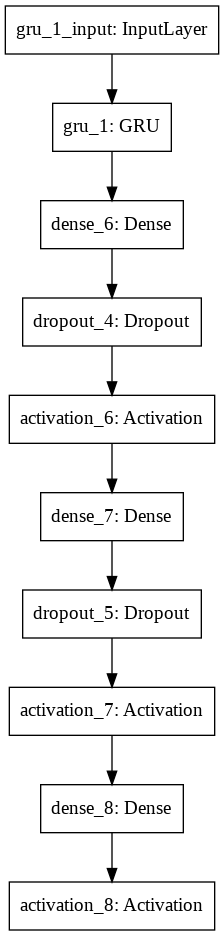

In [ ]:
plot_model(model_B)

In [ ]:
model_B = create_model_GRU()
history2= model_B.fit(np.expand_dims(train_mfccs_array[:training_samples],-1), train_labels_categorical[:training_samples], validation_data=(np.expand_dims(train_mfccs_array[training_samples:training_samples+validation_samples], -1), train_labels_categorical[training_samples:training_samples+validation_samples]), epochs=200, shuffle=True)

Epoch 1/200
50/50 [==============================] - 4s 45ms/step - loss: 1.5579 - accuracy: 0.3354 - val_loss: 1.4963 - val_accuracy: 0.4347
Epoch 2/200
50/50 [==============================] - 2s 37ms/step - loss: 1.4681 - accuracy: 0.4514 - val_loss: 1.4419 - val_accuracy: 0.4347
Epoch 3/200
50/50 [==============================] - 2s 35ms/step - loss: 1.4143 - accuracy: 0.4602 - val_loss: 1.4158 - val_accuracy: 0.4322
Epoch 4/200
50/50 [==============================] - 2s 36ms/step - loss: 1.4094 - accuracy: 0.4690 - val_loss: 1.4025 - val_accuracy: 0.4347
Epoch 5/200
50/50 [==============================] - 2s 36ms/step - loss: 1.3988 - accuracy: 0.4683 - val_loss: 1.3942 - val_accuracy: 0.4347
Epoch 6/200
50/50 [==============================] - 2s 37ms/step - loss: 1.3822 - accuracy: 0.4614 - val_loss: 1.3876 - val_accuracy: 0.4322
Epoch 7/200
50/50 [==============================] - 2s 37ms/step - loss: 1.3723 - accuracy: 0.4690 - val_loss: 1.3818 - val_accuracy: 0.4347
Epoch 

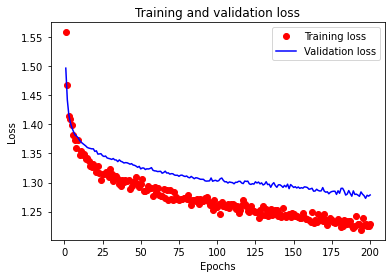

In [ ]:
# loss plots using GRU model
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

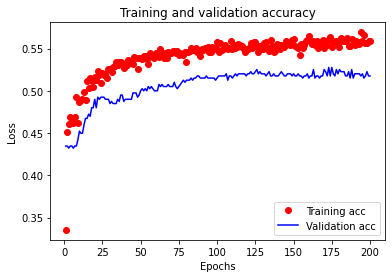

In [ ]:
# accuracy plots using GRU model
plt.clf()                                                

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# evaluate using model B
model_B.evaluate(np.expand_dims(test_mfccs_array[:test_samples], -1), test_labels_categorical[:test_samples])

8/8 [==============================] - 0s 10ms/step - loss: 1.2311 - accuracy: 0.5683


[1.2310863733291626, 0.5682819485664368]

## spec_contrast

In [ ]:
def extract_spec_contrast(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    spec_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr).T, axis=0)
    
    return spec_contrast

In [ ]:
train_spec_contrast = []
test_spec_contrast =[]
for i in trains :
  train_spec_contrast.append(extract_spec_contrast(i))
for i in tests:
  test_spec_contrast.append(extract_spec_contrast(i))

In [ ]:
test_spec_contrast_array = np.asarray(test_spec_contrast)
train_spec_contrast_array = np.asarray(train_spec_contrast)

In [ ]:
test_spec_contrast_array.shape

(227, 7)

In [ ]:
train_spec_contrast_array.shape

(1994, 7)

## **LSTM spec_contrast**

In [ ]:
def create_model2_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(7, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('tanh'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(5))
    model.add(Activation('softmax'))
    
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [ ]:
model2_A = create_model2_LSTM()
history3 = model2_A.fit(np.expand_dims(train_spec_contrast_array[:training_samples],-1), train_labels_categorical[:training_samples], validation_data=(np.expand_dims(train_spec_contrast_array[training_samples:training_samples+validation_samples], -1), train_labels_categorical[training_samples:training_samples+validation_samples]), epochs=200, shuffle=True)

Epoch 1/200
50/50 [==============================] - 3s 21ms/step - loss: 1.5082 - accuracy: 0.3411 - val_loss: 1.4020 - val_accuracy: 0.4070
Epoch 2/200
50/50 [==============================] - 1s 11ms/step - loss: 1.4429 - accuracy: 0.3956 - val_loss: 1.3772 - val_accuracy: 0.5126
Epoch 3/200
50/50 [==============================] - 1s 10ms/step - loss: 1.4161 - accuracy: 0.4069 - val_loss: 1.3627 - val_accuracy: 0.5050
Epoch 4/200
50/50 [==============================] - 1s 11ms/step - loss: 1.3905 - accuracy: 0.4288 - val_loss: 1.3670 - val_accuracy: 0.3869
Epoch 5/200
50/50 [==============================] - 1s 11ms/step - loss: 1.3763 - accuracy: 0.4470 - val_loss: 1.3591 - val_accuracy: 0.4698
Epoch 6/200
50/50 [==============================] - 1s 11ms/step - loss: 1.3484 - accuracy: 0.4752 - val_loss: 1.3352 - val_accuracy: 0.5201
Epoch 7/200
50/50 [==============================] - 1s 11ms/step - loss: 1.3268 - accuracy: 0.4803 - val_loss: 1.3168 - val_accuracy: 0.4925
Epoch 

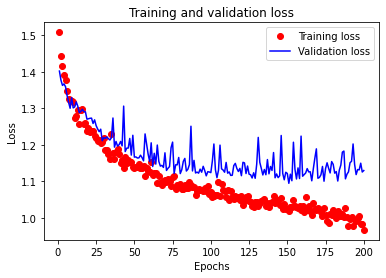

In [ ]:
# loss plots using LSTM model
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

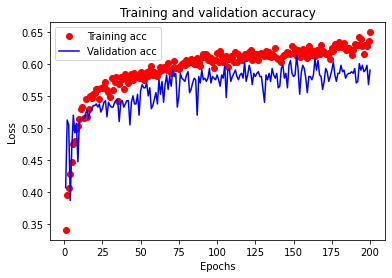

In [ ]:
# accuracy plots using LSTM model
plt.clf()                                                

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# evaluate using model2 A
model2_A.evaluate(np.expand_dims(test_spec_contrast_array[:test_samples], -1), test_labels_categorical[:test_samples])

8/8 [==============================] - 0s 4ms/step - loss: 1.2281 - accuracy: 0.5991


[1.2280800342559814, 0.5991189479827881]

## **GRU spec_contrast**

In [ ]:
def create_model2_GRU():
    model = Sequential()
    model.add(GRU(128, return_sequences=False, input_shape=(7, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('tanh'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(5))
    model.add(Activation('softmax'))
    
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [ ]:
model2_B = create_model2_GRU()
history4 = model2_B.fit(np.expand_dims(train_spec_contrast_array[:training_samples],-1), train_labels_categorical[:training_samples], validation_data=(np.expand_dims(train_spec_contrast_array[training_samples:training_samples+validation_samples], -1), train_labels_categorical[training_samples:training_samples+validation_samples]), epochs=200, shuffle=True)

Epoch 1/200
50/50 [==============================] - 3s 19ms/step - loss: 1.4959 - accuracy: 0.3273 - val_loss: 1.4096 - val_accuracy: 0.3618
Epoch 2/200
50/50 [==============================] - 0s 9ms/step - loss: 1.4496 - accuracy: 0.3630 - val_loss: 1.4102 - val_accuracy: 0.3744
Epoch 3/200
50/50 [==============================] - 0s 10ms/step - loss: 1.4183 - accuracy: 0.3937 - val_loss: 1.4186 - val_accuracy: 0.5276
Epoch 4/200
50/50 [==============================] - 0s 10ms/step - loss: 1.4216 - accuracy: 0.4082 - val_loss: 1.3826 - val_accuracy: 0.3945
Epoch 5/200
50/50 [==============================] - 0s 10ms/step - loss: 1.3856 - accuracy: 0.4401 - val_loss: 1.3378 - val_accuracy: 0.5251
Epoch 6/200
50/50 [==============================] - 0s 10ms/step - loss: 1.3708 - accuracy: 0.4627 - val_loss: 1.3527 - val_accuracy: 0.4724
Epoch 7/200
50/50 [==============================] - 0s 10ms/step - loss: 1.3704 - accuracy: 0.4690 - val_loss: 1.3892 - val_accuracy: 0.4121
Epoch 8

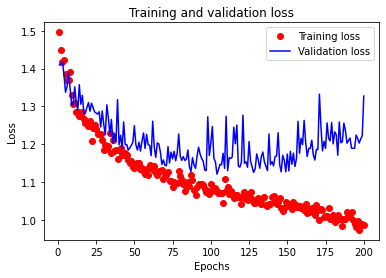

In [ ]:
# loss plots using GRU model
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

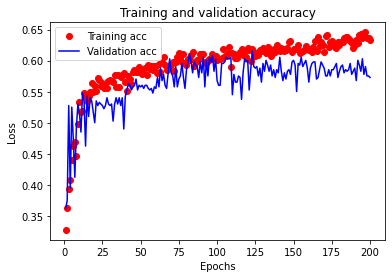

In [ ]:
# accuracy plots using GRU model
plt.clf()                                                

acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# evaluate using model2 B
model2_B.evaluate(np.expand_dims(test_spec_contrast_array[:test_samples], -1), test_labels_categorical[:test_samples])

8/8 [==============================] - 0s 3ms/step - loss: 1.4745 - accuracy: 0.5815


[1.4745107889175415, 0.5814977884292603]